# d-clean

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

from helper_function import reduce_cars_in_distance
from helper_function import select_day
from helper_function import loadData
from visualization import plotReducedLoops

from finalNN import NN

Using TensorFlow backend.


## Lese Daten und Model
Als Model wurde eine neuronales Netzwerk verwendet.

In [2]:
data = loadData(timestemp=True)

neuralNetwork = NN(loadPathModel="./modelNN_save.json", 
                   loadPathWeights="./modelNN_save.h5")

## Wählen Sie das Gebiet und die Reduzierung der Autos in Prozent
Das Gebiet kann durch eine Koordinate (geographisches Koordinatensystem) und einem Radius *R* in Metern gewählt werden. 

In [3]:
coordinates = (50.127, 8.693)
R = 1000 # Meters 
reduce = 20 # Reduce cars in area by given percentage

data_reducedCars = reduce_cars_in_distance(data, 1-reduce/100, R, coordinates[0], coordinates[1])

## Wählen Sie einen Tag zur Visualisierung
Alles im Zeitraum vom 01.07.2018 bis 31.10.2018 kann verwendet werden.

In [4]:
year = "2018"
month = "07"
day = "12"

dayData_reduced = select_day(data_reducedCars, month=month, day=day)
dayData = select_day(data, month=month, day=day)

-------------------
## Ergebnisse


========= Map of loops =========


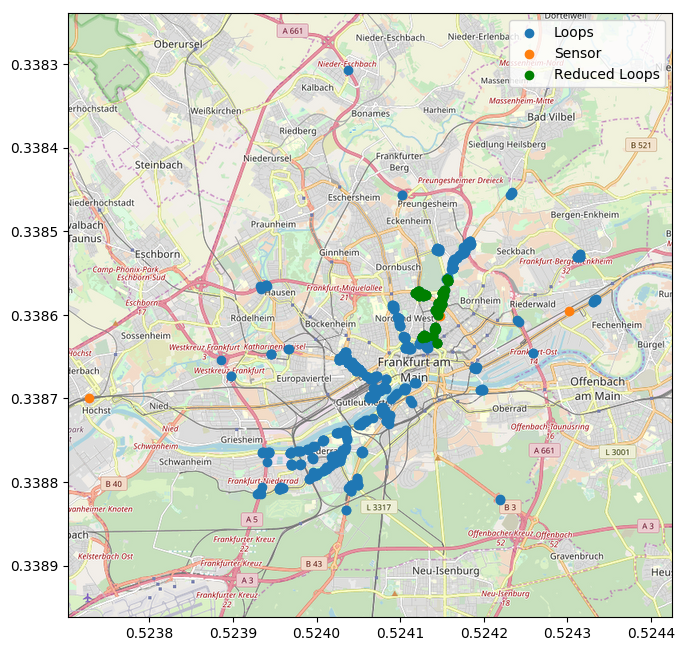

========= Prediction over the day =========


<Figure size 432x288 with 0 Axes>

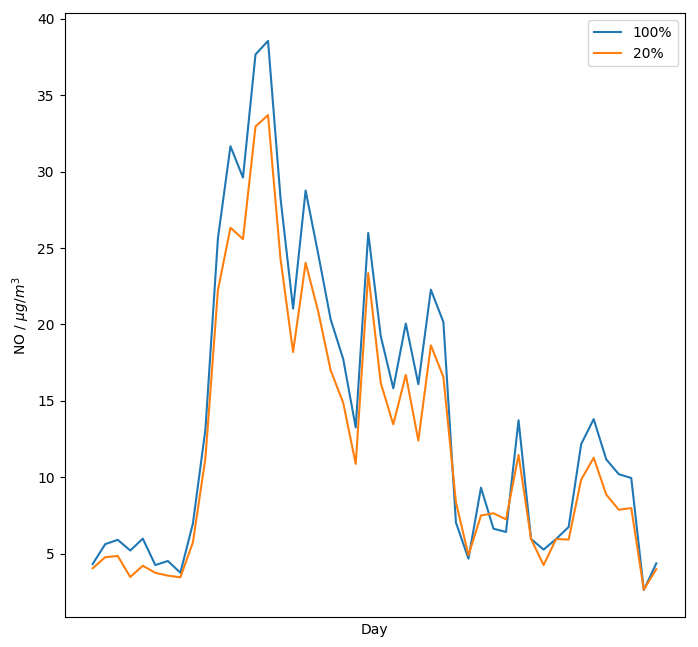

========= Mean NO in $\mu g / m^3$ over day =========

 Without reducing: 14.186187

 With reducing (Percentage: 20, R: 1000, Coordinates: (50.127000, 8.693000)): 12.155285


In [5]:
predictionDay_reduced = neuralNetwork.predict(dayData_reduced)
predictionDay = neuralNetwork.predict(dayData)

print("========= Map of loops =========")
plotReducedLoops(dayData, R, coordinates)

plt.figure()
print("========= Prediction over the day =========")
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.plot(predictionDay, label="100%")
ax.plot(predictionDay_reduced, label=""+repr(reduce)+"%")
plt.xlabel('Day')
plt.ylabel('NO / $\mu g / m^3$')
ax.get_xaxis().set_ticks([])
ax.legend()
plt.show()

print("========= Mean NO in $\mu g / m^3$ over day =========")
print("\n Without reducing: %f" % (sum(predictionDay)/len(predictionDay)))
print("\n With reducing (Percentage: %d, R: %d, Coordinates: (%f, %f)): %f" % 
      (reduce, R, coordinates[0], coordinates[1], (sum(predictionDay_reduced)/len(predictionDay_reduced))))